<div style="background-color: #eee3d3">
<h1> 1-clean_HILIC_POS_peakTable.ipynb </h1>
</div>

# Change peak table form

In this notebook, we will change the form of the peak table to have the variables in columns and samples in rows. We will also add the groups (Liver Cancer vs. Case control) as a column with the metadata text file.

---

# Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import re
pwd = ! pwd
pwd = re.sub('notebooks', '', pwd[0])
pwd

'/home/jovyan/work/'

# Import peak table HILIC POS

In [3]:
#path_peakTable = input('Enter absolute path to the peak table txt file : ')
path_peakTable = pwd + 'data/HILIC_POS_results/process_output_quantid_pos_camera_metfrag/peaktablePOSout_pos_metfrag.txt'

In [4]:
peakTable_HILIC_POS = pd.read_csv(path_peakTable, sep='\t', decimal='.', na_values='NA')
peakTable_HILIC_POS.head()

,dataMatrix,EPIC_Liver_Cancer_NR160809_007_41_LivCan_153_007.mzML,EPIC_Liver_Cancer_NR160809_008_41_LivCan_154_008.mzML,EPIC_Liver_Cancer_NR160809_009_41_LivCan_267_009.mzML,EPIC_Liver_Cancer_NR160809_010_41_LivCan_268_010.mzML,EPIC_Liver_Cancer_NR160809_014_21_LivCan_299_014.mzML,EPIC_Liver_Cancer_NR160809_015_21_LivCan_300_015.mzML,EPIC_Liver_Cancer_NR160809_018_22_LivCan_085_018.mzML,EPIC_Liver_Cancer_NR160809_019_22_LivCan_086_019.mzML,EPIC_Liver_Cancer_NR160809_020_25_LivCan_309_020.mzML,...,EPIC_Liver_Cancer_NR160809_270_35_LivCan_161_270.mzML,EPIC_Liver_Cancer_NR160809_271_35_LivCan_162_271.mzML,EPIC_Liver_Cancer_NR160809_272_72_LivCan_395_272.mzML,EPIC_Liver_Cancer_NR160809_273_72_LivCan_396_273.mzML,EPIC_Liver_Cancer_NR160809_274_32_LivCan_079_274.mzML,EPIC_Liver_Cancer_NR160809_275_32_LivCan_080_275.mzML,EPIC_Liver_Cancer_NR160809_281_22_LivCan_375_281.mzML,EPIC_Liver_Cancer_NR160809_282_22_LivCan_376_282.mzML,EPIC_Liver_Cancer_NR160809_283_71_LivCan_165_283.mzML,EPIC_Liver_Cancer_NR160809_284_71_LivCan_166_284.mzML
0,variable_3,19.761786,19.735279,19.116076,19.376875,19.555938,19.377437,19.526568,19.349326,19.610237,...,19.289850,18.755673,19.206871,19.072781,18.642347,19.664978,19.301954,19.170626,18.869505,18.954904
1,variable_5,14.635833,15.193396,15.446714,15.460525,14.515536,14.913215,14.648653,14.454301,14.713504,...,13.975330,14.763973,14.132566,14.000931,14.827403,14.447858,14.839941,14.291711,14.440576,NaN
2,variable_6,22.185582,20.831414,22.152604,22.169389,22.150249,22.198844,22.092599,22.093306,22.006737,...,21.387145,20.905625,21.151963,20.995952,21.020579,20.808503,21.085175,21.381912,20.961485,20.005032
3,variable_7,16.414744,15.052533,16.410827,16.403964,16.372219,16.428678,16.311085,16.302336,16.196649,...,15.588615,15.157680,15.429988,15.693299,15.238728,15.027154,15.321075,15.197205,14.829978,NaN
4,variable_8,12.615143,NaN,NaN,12.720767,12.314019,NaN,12.472396,NaN,12.438756,...,12.545073,12.435317,12.541107,12.839636,NaN,12.648327,12.510670,12.499558,12.312338,12.414258


In [5]:
peakTable_HILIC_POS.shape

(557, 187)

The peak table contains variables in rows (557 variables) and samples in columns (187 samples).

# Import sample metadata

In [6]:
#path_sampleMetadata = input('Enter absolute path to the sample metadata txt file : ')
path_sampleMetadata = pwd + 'data/HILIC_POS_results/process_output_quantid_pos_camera_metfrag/metadataPOSout_pos_metfrag.txt'

In [7]:
metadata_HILIC_POS = pd.read_csv(path_sampleMetadata, sep='\t', decimal='.', na_values='NA')
metadata_HILIC_POS.head()

,sampleMetadata,Class,Groups,X
0,EPIC_Liver_Cancer_NR160809_007_41_LivCan_153_0...,Samples,Incident,NaN
1,EPIC_Liver_Cancer_NR160809_008_41_LivCan_154_0...,Samples,Non_case,NaN
2,EPIC_Liver_Cancer_NR160809_009_41_LivCan_267_0...,Samples,Incident,NaN
3,EPIC_Liver_Cancer_NR160809_010_41_LivCan_268_0...,Samples,Non_case,NaN
4,EPIC_Liver_Cancer_NR160809_014_21_LivCan_299_0...,Samples,Incident,NaN


In [8]:
metadata_HILIC_POS.shape

(186, 4)

In [9]:
metadata_HILIC_POS.insert(1, 'SampleID', ['_'.join(filename.split('_')[6:8]) for filename in metadata_HILIC_POS['sampleMetadata']])

In [10]:
metadata_HILIC_POS

,sampleMetadata,SampleID,Class,Groups,X
0,EPIC_Liver_Cancer_NR160809_007_41_LivCan_153_0...,LivCan_153,Samples,Incident,NaN
1,EPIC_Liver_Cancer_NR160809_008_41_LivCan_154_0...,LivCan_154,Samples,Non_case,NaN
2,EPIC_Liver_Cancer_NR160809_009_41_LivCan_267_0...,LivCan_267,Samples,Incident,NaN
3,EPIC_Liver_Cancer_NR160809_010_41_LivCan_268_0...,LivCan_268,Samples,Non_case,NaN
4,EPIC_Liver_Cancer_NR160809_014_21_LivCan_299_0...,LivCan_299,Samples,Incident,NaN
...,...,...,...,...,...
181,EPIC_Liver_Cancer_NR160809_275_32_LivCan_080_2...,LivCan_080,Samples,Non_case,NaN
182,EPIC_Liver_Cancer_NR160809_281_22_LivCan_375_2...,LivCan_375,Samples,Incident,NaN
183,EPIC_Liver_Cancer_NR160809_282_22_LivCan_376_2...,LivCan_376,Samples,Non_case,NaN
184,EPIC_Liver_Cancer_NR160809_283_71_LivCan_165_2...,LivCan_165,Samples,Incident,NaN


In [11]:
EPIC_Liver_sample_informations = pd.read_csv(pwd + 'data/metadata/EPIC-Liver_sample_informations.csv')
EPIC_Liver_sample_informations = EPIC_Liver_sample_informations[EPIC_Liver_sample_informations['Id Metabo'].isin(metadata_HILIC_POS['SampleID'])]
EPIC_Liver_sample_informations = EPIC_Liver_sample_informations.set_index('Id Metabo')
EPIC_Liver_sample_informations = EPIC_Liver_sample_informations.reindex(index=metadata_HILIC_POS['SampleID'])
EPIC_Liver_sample_informations = EPIC_Liver_sample_informations.reset_index()
EPIC_Liver_sample_informations = EPIC_Liver_sample_informations[['SampleID', 'CaseCtrl', 'Match_Caseset', 'Typ_Tumo', 'Case_HCC_Wide', 'Idepic', 'Idepic_Bio', 'Id Aliquot']]
EPIC_Liver_sample_informations = EPIC_Liver_sample_informations.rename(columns={'CaseCtrl': 'Groups', 'Match_Caseset': 'MatchCaseset', 'Typ_Tumo': 'TypTumo', 'Case_HCC_Wide': 'CaseHCCWide', 'Idepic': 'EPICID', 'Idepic_Bio': 'EPICBioID', 'Id Aliquot': 'AliquotID'})
EPIC_Liver_sample_informations['TypTumo'] = EPIC_Liver_sample_informations['TypTumo'].str.replace('/', '')
EPIC_Liver_sample_informations

,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID
0,LivCan_153,Incident,82,HCC,Yes,41____41041872,41____41041872,41041872-s2#C
1,LivCan_154,Non-case,82,NaN,No,41____41046868,41____41046868,41046868-s2#C
2,LivCan_267,Incident,427,HCC,Yes,41____41074588,41____41074588,41074588-s1#B
3,LivCan_268,Non-case,427,NaN,No,41____41089214,41____41089214,41089214-s1#B
4,LivCan_299,Incident,376,HCC_Wide,Yes,21____21103888,21____21103888,21103888-s1#B
...,...,...,...,...,...,...,...,...
181,LivCan_080,Non-case,56,NaN,No,32____3208004E,32____32253231,32253231-s3#C
182,LivCan_375,Incident,383,HCC,Yes,22____22281416,22____22281416,22281416-s1#B
183,LivCan_376,Non-case,383,NaN,No,22____22281701,22____22281701,22281701-s1#B
184,LivCan_165,Incident,147,HCC,Yes,71____71000825,71____71000065,71000065-s2#C


# Change form of the peak table

In [12]:
# Keep variable names in a separate list for the column names
variable_names = peakTable_HILIC_POS['dataMatrix'].values

# Transpose the peak table
peakTable_HILIC_POS = peakTable_HILIC_POS.iloc[:,1:].transpose()

# Reset the indexes
peakTable_HILIC_POS = peakTable_HILIC_POS.reset_index()

# Add a column with simplified file names
peakTable_HILIC_POS.insert(1, 'SampleID', ['_'.join(filename.split('_')[6:8]) for filename in metadata_HILIC_POS['sampleMetadata']])

# Delete column with full file name
peakTable_HILIC_POS = peakTable_HILIC_POS.iloc[:,2:]

# Add column names with variables
peakTable_HILIC_POS.columns = variable_names

In [13]:
peakTable_HILIC_POS

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,19.761786,14.635833,22.185582,16.414744,12.615143,15.580604,15.881437,17.500899,12.792893,16.805604,...,12.052252,12.568647,13.192848,13.230752,12.248590,12.114328,14.269258,12.355017,13.114289,13.882526
1,19.735279,15.193396,20.831414,15.052533,NaN,15.145423,14.034654,17.953780,NaN,15.907714,...,13.020365,12.928643,13.697314,NaN,12.604052,NaN,NaN,12.208084,NaN,NaN
2,19.116076,15.446714,22.152604,16.410827,NaN,14.628890,15.316772,17.404715,12.786407,15.947176,...,NaN,NaN,NaN,13.330175,NaN,NaN,14.215988,NaN,12.955618,13.778398
3,19.376875,15.460525,22.169389,16.403964,12.720767,15.937169,15.967749,15.836957,NaN,16.371211,...,NaN,NaN,13.086805,13.304171,NaN,11.605353,14.284148,12.319119,13.058285,13.812829
4,19.555938,14.515536,22.150249,16.372219,12.314019,14.950203,15.294906,16.610171,12.214057,16.171763,...,NaN,NaN,NaN,13.306722,12.349830,11.926237,14.192775,NaN,13.006556,13.841201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,19.664978,14.447858,20.808503,15.027154,12.648327,14.806952,14.244917,17.126579,12.080710,15.388376,...,12.349299,11.505004,13.189121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,19.301954,14.839941,21.085175,15.321075,12.510670,14.488147,15.163197,16.816591,12.452644,16.474456,...,12.909283,12.642143,NaN,NaN,12.708850,12.462751,12.175110,12.635066,NaN,NaN
183,19.170626,14.291711,21.381912,15.197205,12.499558,14.434959,14.520558,16.315887,12.808417,15.613263,...,12.846355,13.243400,NaN,NaN,12.199647,NaN,NaN,12.258149,NaN,NaN
184,18.869505,14.440576,20.961485,14.829978,12.312338,14.114074,13.776358,16.110117,12.667428,16.021372,...,12.477753,11.789382,NaN,NaN,11.628154,NaN,NaN,NaN,NaN,NaN


# Remove features with strong positive correlation

In [14]:
variable_identification = pd.read_csv(pwd + 'data/HILIC_POS_results/process_output_quantid_pos_camera_metfrag/varsPOSout_pos_metfrag.txt', sep='\t', decimal='.', na_values='NA')
variable_identification

,variableMetadata,parentMZ,parentRT,Score,MonoisotopicMass,SMILES,InChIKey,Name,NoExplPeaks,NumberPeaksUsed,...,xcmsCamera_mzmin,xcmsCamera_mzmax,xcmsCamera_rt,xcmsCamera_rtmin,xcmsCamera_rtmax,xcmsCamera_npeaks,xcmsCamera_isotopes,xcmsCamera_adduct,xcmsCamera_pcgroup,imputed
0,variable_3,61.0398,93.949,2.0,60.032363,NC(N)=O,XSQUKJJJFZCRTK-UHFFFAOYSA-N,Urea,31,52,...,61.039608,61.039794,93.3840,92.664,94.640,211,NaN,NaN,36,No
1,variable_5,62.0601,276.539,2.0,61.052764,NCCO,HZAXFHJVJLSVMW-UHFFFAOYSA-N,Ethanolamine,40,175,...,62.059914,62.060261,275.0040,273.825,275.644,210,NaN,NaN,56,No
2,variable_6,140.0682,304.407,2.0,117.078979,NCCCCC(O)=O,JJMDCOVWQOJGCB-UHFFFAOYSA-N,delta-Aminovaleric acid,115,287,...,64.015582,64.016015,299.3860,195.740,317.234,272,[1][M]+,NaN,22,yes
3,variable_7,140.0682,304.407,2.0,117.078979,NCCCCC(O)=O,JJMDCOVWQOJGCB-UHFFFAOYSA-N,delta-Aminovaleric acid,115,287,...,65.018672,65.019122,299.3890,276.857,300.455,213,[1][M+1]+,NaN,22,yes
4,variable_8,61.0398,93.949,2.0,60.032363,NC(N)=O,XSQUKJJJFZCRTK-UHFFFAOYSA-N,Urea,31,52,...,65.018564,65.019229,93.3840,39.738,94.640,154,NaN,NaN,36,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,variable_2365,288.2907,58.514,2.0,270.255880,CCCCCCCCCCCCCCCCC(O)=O,KEMQGTRYUADPNZ-UHFFFAOYSA-N,Margaric acid (17:0),136,392,...,1109.058605,1109.063525,64.1250,63.258,64.813,111,NaN,NaN,10,yes
553,variable_2368,140.0682,304.407,2.0,117.078979,NCCCCC(O)=O,JJMDCOVWQOJGCB-UHFFFAOYSA-N,delta-Aminovaleric acid,115,287,...,1110.784086,1110.788437,299.6370,298.698,300.660,179,NaN,NaN,22,yes
554,variable_2370,288.2907,58.514,2.0,270.255880,CCCCCCCCCCCCCCCCC(O)=O,KEMQGTRYUADPNZ-UHFFFAOYSA-N,Margaric acid (17:0),136,392,...,1129.561770,1129.566054,62.9080,62.039,63.575,123,NaN,NaN,10,yes
555,variable_2375,140.0682,304.407,2.0,117.078979,NCCCCC(O)=O,JJMDCOVWQOJGCB-UHFFFAOYSA-N,delta-Aminovaleric acid,115,287,...,1144.776441,1144.781069,299.9940,298.776,300.661,131,NaN,NaN,22,yes


In [15]:
def remove_redundant_features(variable_identification, peakTable):
    
    print(120 * '-')
    
    col_to_keep = []
    count = variable_identification['Name'].value_counts(ascending=False)
    compound_for_plot = count[count.values < 30].index[0]
    
    
    for compound in variable_identification['Name'].unique():
    
        subset = variable_identification[variable_identification['Name'] == compound]
        variables = subset['variableMetadata']
        peakTable_HILIC_POS_subset = peakTable_HILIC_POS[variables.values]

        corr = peakTable_HILIC_POS_subset.corr()
        
        if compound == compound_for_plot:
            print(f'----- Example for compound <{compound_for_plot}> :\n')

            plt.figure(figsize=(16, 10))
            sns.heatmap(corr, annot=True, fmt='.1g')
            plt.xticks(rotation=90)
            plt.yticks(rotation=0)
            plt.title(f'Features for compound <{compound_for_plot}>', fontsize = 18)
            plt.show()



        columns = np.full((corr.shape[0],), True, dtype=bool)
        for i in range(corr.shape[0]):
            for j in range(i+1, corr.shape[0]):
                if corr.iloc[i,j] >= 0.9:
                    if columns[j]:
                        columns[j] = False
                        
                        
        selected_columns = subset['variableMetadata'][columns].values
        peakTable_HILIC_POS_subset[selected_columns]
        col_to_keep.extend(selected_columns)
        

        if compound == compound_for_plot:
            print()
            plt.figure(figsize=(16, 10))
            sns.heatmap(peakTable_HILIC_POS_subset[selected_columns].corr(), annot=True, fmt='.2f')
            plt.xticks(rotation=90)
            plt.yticks(rotation=0)
            plt.title(f'Features for compound <{compound_for_plot}> after removing ones with strong positive correlation', fontsize = 14)
            plt.show()

            #print(f"Adducts : {subset['xcmsCamera_isotopes'].unique()}")
            
    print()
    print(f'----- Initially, we had {len(peakTable.columns)} features in the peak table.')
    print(f'----- After removing ones with strong positive correlationn, we have {len(col_to_keep)} features left.\n')
    
    col_to_keep = peakTable.columns[peakTable.columns.isin(col_to_keep)].values
    
    
    return peakTable[col_to_keep]

------------------------------------------------------------------------------------------------------------------------
----- Example for compound <Lysophosphatidylcholine C20:4> :



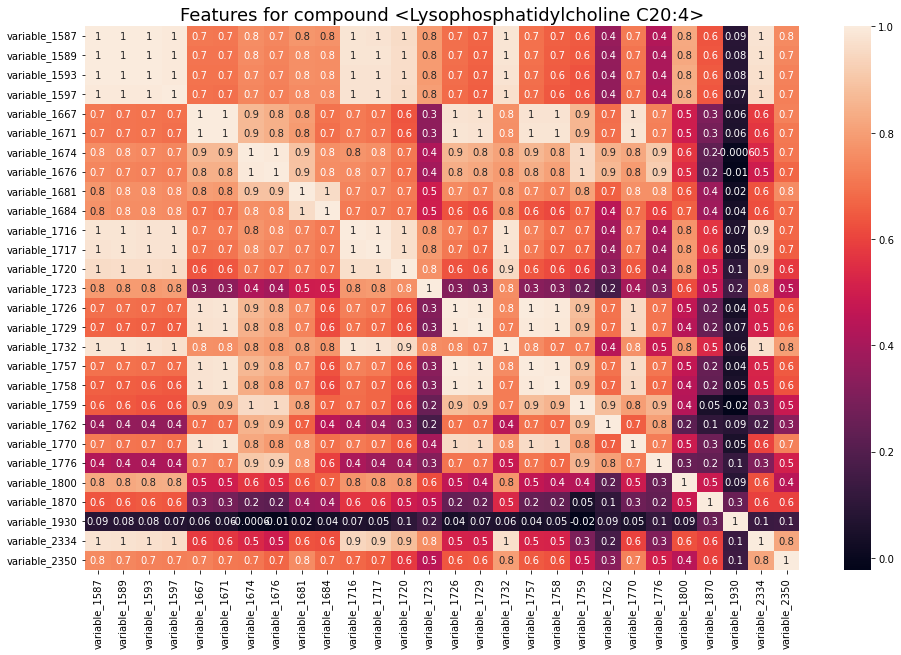

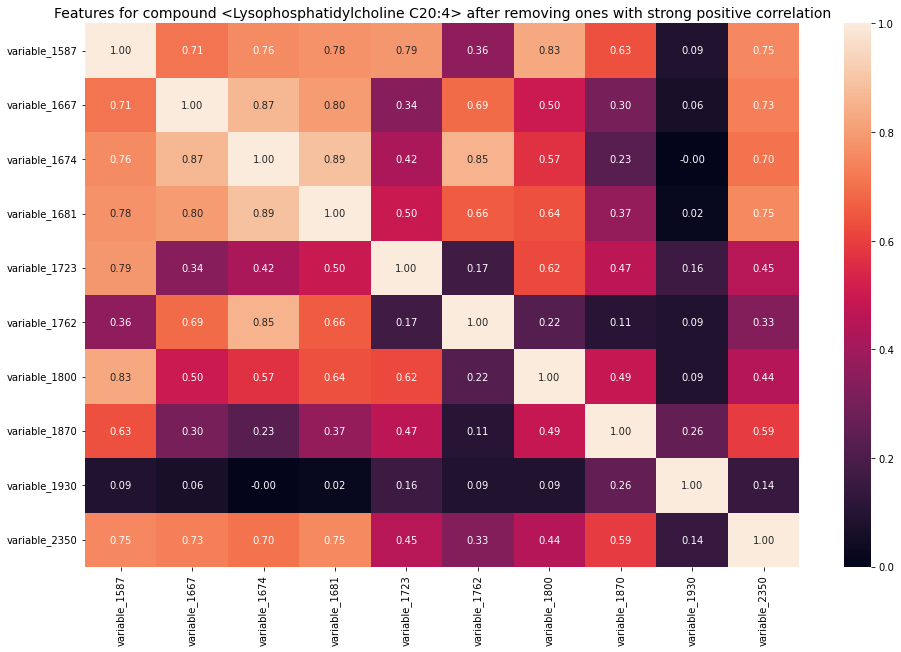


----- Initially, we had 557 features in the peak table.
----- After removing ones with strong positive correlationn, we have 329 features left.



,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,19.761786,14.635833,22.185582,12.615143,15.580604,15.881437,17.500899,12.792893,16.805604,16.805842,...,13.194216,12.885181,NaN,13.330208,12.052252,12.568647,13.192848,12.248590,12.114328,12.355017
1,19.735279,15.193396,20.831414,NaN,15.145423,14.034654,17.953780,NaN,15.907714,14.977232,...,12.700734,12.742979,11.929552,13.464403,13.020365,12.928643,13.697314,12.604052,NaN,12.208084
2,19.116076,15.446714,22.152604,NaN,14.628890,15.316772,17.404715,12.786407,15.947176,16.238502,...,12.618229,12.485436,11.709115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.376875,15.460525,22.169389,12.720767,15.937169,15.967749,15.836957,NaN,16.371211,17.052231,...,12.720631,12.564338,NaN,13.397322,NaN,NaN,13.086805,NaN,11.605353,12.319119
4,19.555938,14.515536,22.150249,12.314019,14.950203,15.294906,16.610171,12.214057,16.171763,16.107590,...,12.564943,12.344968,12.127879,NaN,NaN,NaN,NaN,12.349830,11.926237,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,19.664978,14.447858,20.808503,12.648327,14.806952,14.244917,17.126579,12.080710,15.388376,15.352711,...,NaN,12.125251,NaN,12.686218,12.349299,11.505004,13.189121,NaN,NaN,NaN
182,19.301954,14.839941,21.085175,12.510670,14.488147,15.163197,16.816591,12.452644,16.474456,15.953391,...,13.428278,12.629126,12.360380,NaN,12.909283,12.642143,NaN,12.708850,12.462751,12.635066
183,19.170626,14.291711,21.381912,12.499558,14.434959,14.520558,16.315887,12.808417,15.613263,15.522875,...,13.213899,NaN,11.870228,12.680070,12.846355,13.243400,NaN,12.199647,NaN,12.258149
184,18.869505,14.440576,20.961485,12.312338,14.114074,13.776358,16.110117,12.667428,16.021372,14.859646,...,12.442173,12.291946,NaN,NaN,12.477753,11.789382,NaN,11.628154,NaN,NaN


In [16]:
peakTable_remove_corr = remove_redundant_features(variable_identification, peakTable_HILIC_POS)
peakTable_remove_corr

In [17]:
peakTable_HILIC_POS_full = EPIC_Liver_sample_informations.join(peakTable_HILIC_POS)
peakTable_HILIC_POS_full.head()

,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID,variable_3,variable_5,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,LivCan_153,Incident,82,HCC,Yes,41____41041872,41____41041872,41041872-s2#C,19.761786,14.635833,...,12.052252,12.568647,13.192848,13.230752,12.248590,12.114328,14.269258,12.355017,13.114289,13.882526
1,LivCan_154,Non-case,82,NaN,No,41____41046868,41____41046868,41046868-s2#C,19.735279,15.193396,...,13.020365,12.928643,13.697314,NaN,12.604052,NaN,NaN,12.208084,NaN,NaN
2,LivCan_267,Incident,427,HCC,Yes,41____41074588,41____41074588,41074588-s1#B,19.116076,15.446714,...,NaN,NaN,NaN,13.330175,NaN,NaN,14.215988,NaN,12.955618,13.778398
3,LivCan_268,Non-case,427,NaN,No,41____41089214,41____41089214,41089214-s1#B,19.376875,15.460525,...,NaN,NaN,13.086805,13.304171,NaN,11.605353,14.284148,12.319119,13.058285,13.812829
4,LivCan_299,Incident,376,HCC_Wide,Yes,21____21103888,21____21103888,21103888-s1#B,19.555938,14.515536,...,NaN,NaN,NaN,13.306722,12.349830,11.926237,14.192775,NaN,13.006556,13.841201


In [19]:
print(peakTable_HILIC_POS_full.shape)

(186, 565)


In [21]:
peakTable_HILIC_POS_remove_corr = EPIC_Liver_sample_informations.join(peakTable_remove_corr)
peakTable_HILIC_POS_remove_corr.head()

,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID,variable_3,variable_5,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,LivCan_153,Incident,82,HCC,Yes,41____41041872,41____41041872,41041872-s2#C,19.761786,14.635833,...,13.194216,12.885181,NaN,13.330208,12.052252,12.568647,13.192848,12.248590,12.114328,12.355017
1,LivCan_154,Non-case,82,NaN,No,41____41046868,41____41046868,41046868-s2#C,19.735279,15.193396,...,12.700734,12.742979,11.929552,13.464403,13.020365,12.928643,13.697314,12.604052,NaN,12.208084
2,LivCan_267,Incident,427,HCC,Yes,41____41074588,41____41074588,41074588-s1#B,19.116076,15.446714,...,12.618229,12.485436,11.709115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LivCan_268,Non-case,427,NaN,No,41____41089214,41____41089214,41089214-s1#B,19.376875,15.460525,...,12.720631,12.564338,NaN,13.397322,NaN,NaN,13.086805,NaN,11.605353,12.319119
4,LivCan_299,Incident,376,HCC_Wide,Yes,21____21103888,21____21103888,21103888-s1#B,19.555938,14.515536,...,12.564943,12.344968,12.127879,NaN,NaN,NaN,NaN,12.349830,11.926237,NaN


In [22]:
print(peakTable_HILIC_POS_remove_corr.shape)

(186, 337)


# Save cleaned peak table in csv file

In [23]:
#path_save_table = input('Enter absolute path to the folder to save the peak table : ')
path_save_table = pwd + 'data/peakTable/original_peak_table/'

In [46]:
peakTable_HILIC_POS_full.to_csv(path_save_table + 'peakTable_HILIC_POS_full.csv', index = False, header=True)
peakTable_HILIC_POS_remove_corr.to_csv(path_save_table + 'peakTable_HILIC_POS_remove_corr.csv', index = False, header=True)